## <center> Проект: Анализ БД hh.ru

In [1]:
import pandas as pd
import psycopg2

Создаем соединение с заданными параметрами

In [ ]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# СТРУКТУРА ДАННЫХ

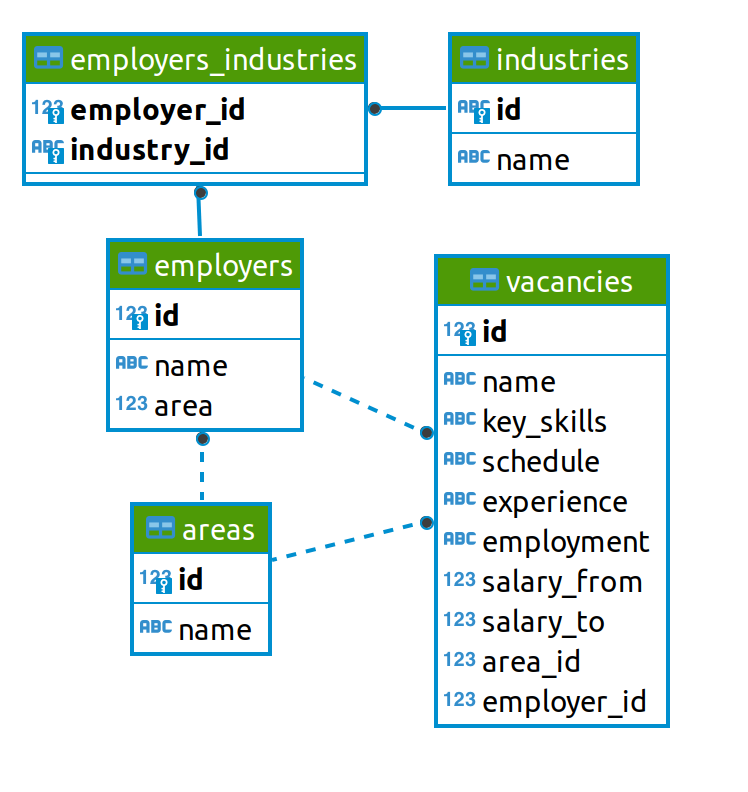

# Познакомимся с каждой таблицей.

**VACANCIES**

Таблица хранит в себе данные по вакансиям и содержит следующие столбцы:

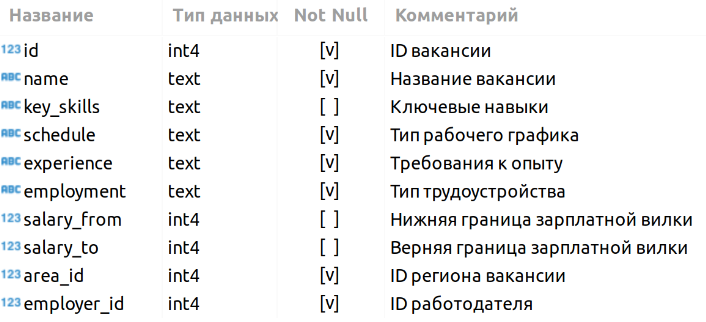

**AREAS**

Таблица-справочник, которая хранит код региона и его название.

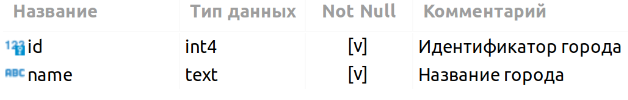

**EMPLOYERS**

Таблица-справочник со списком работодателей.

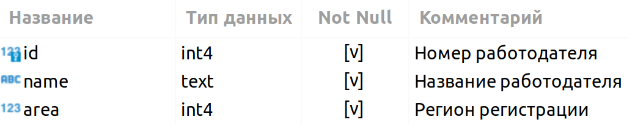

**INDUSTRIES**

Таблица-справочник вариантов сфер деятельности работодателей.

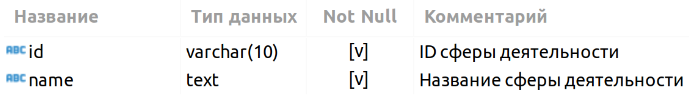

**EMPLOYERS_INDUSTRIES**

Таблица для организации связи между работодателями и сферами их деятельности.

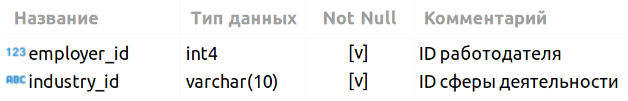

# 1. Предварительный анализ

**1.1 Количество вакансий в базе**

In [9]:
query = f'''select count(*)
            from vacancies
         '''
         
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\neo19\AppData\Local\Temp\ipykernel_19924\3436561997.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,49197


**1.2 Количество работодателей**

In [10]:
query = f'''select count(*)
            from employers
         '''
         
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\neo19\AppData\Local\Temp\ipykernel_19924\3970184315.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,23501


**1.3 Количетво регионов**

In [11]:
query = f'''select count(*)
            from areas
         '''
         
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\neo19\AppData\Local\Temp\ipykernel_19924\2317178533.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,1362


**1.4 Количество сфер деятельности**

In [12]:
query = f'''select count(*)
            from industries
         '''
         
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\neo19\AppData\Local\Temp\ipykernel_19924\24294091.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,294


Вывод: 
- Видно, что на каждого работодателя в среднем приходится всего две вакансии, следовательно на рынке достаточно много работадателей без вакансий или с одной вакансией
- В среднем в регионах наблюдается 42 вакансии. Из за маленькой выборки
- В среднем в регионах наблюдается 42 вакансии. Из за маленькой выборки

# 2. Детальный анализ

**2.1 Количество вакансий в каждом регионе. Пятерка лидеров.**

In [13]:
query = f'''SELECT a.name,
               count(v.id)
            FROM vacancies as v
               JOIN areas as a ON v.area_id = a.id
            GROUP BY a.name
            ORDER BY 2 DESC
            LIMIT 5
         '''
         
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\neo19\AppData\Local\Temp\ipykernel_19924\2884030717.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,name,count
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


**2.2 Количество вакансий, у которых заполнено хотя бы одно из двух полей с зарплатой**

In [14]:
query = f'''SELECT COUNT(*)
            FROM vacancies
            WHERE (salary_from is not null) or (salary_to is not null)
         '''
         
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\neo19\AppData\Local\Temp\ipykernel_19924\2645261697.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,24073


**2.3 Средние значение для нижней и верхней границы зарплатной вилки.**

**Нижняя граница:**

In [15]:
query = f'''SELECT AVG(salary_from)
            FROM vacancies
            WHERE salary_from is not null
         '''
         
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\neo19\AppData\Local\Temp\ipykernel_19924\1876069976.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,avg
0,71064.657901


Вывод: 

**Верхняя граница:**

In [16]:
query = f'''SELECT AVG(salary_to)
            FROM vacancies
            WHERE salary_to is not null
         '''
         
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\neo19\AppData\Local\Temp\ipykernel_19924\144710900.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,avg
0,110536.741923


**2.4 Количество вакансий для каждого сочетания типа рабочего графика и типа трудоустройства, используемого в вакансиях**

In [17]:
query = f'''SELECT schedule,
                employment,
                count(id)
            FROM vacancies
            GROUP BY schedule, employment
            ORDER BY 3 DESC
         '''
         
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\neo19\AppData\Local\Temp\ipykernel_19924\1778115245.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


**2.5 Значения поля Требуемый опыт работы в порядке возрастания количества вакансий**

In [18]:
query = f'''SELECT experience,
                COUNT(id)
            FROM vacancies
            GROUP BY experience
         '''
         
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\neo19\AppData\Local\Temp\ipykernel_19924\2457580525.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,experience,count
0,Более 6 лет,1337
1,От 3 до 6 лет,14511
2,Нет опыта,7197
3,От 1 года до 3 лет,26152


Вывод:
- Ожидаемо, в топе по количеству вакансий - города миллионнки
- Конкретно зарплата указывается только в половине вакансий
- В среднем зарплата находится на отрезке (71000, 110000) тыс. руб.
- В основном работодатели хотят тудоустрайства соискателей на полную занятость (Полный день в это категории занимает занимает 72% всех вакансий представленых на рынке).
- Преобладают вакансии для начинающий специолистов с опытом работы от года до 6 лет

# 3. Анализ работодателей

**3.1 Количество вакансий у работодателей**

In [19]:
query = f'''SELECT e.name,
                COUNT(v.id)
            FROM vacancies  as v
                JOIN employers as e ON v.employer_id = e.id
            GROUP BY e.name
            ORDER BY 2 DESC
            LIMIT 5
         '''
         
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\neo19\AppData\Local\Temp\ipykernel_19924\3427079033.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


**3.2 Количество работодателей для каждого региона. Среди регионов, в которых нет вакансий, найдем тот, в котором наибольшее количество работодателей**

In [20]:
query = f'''SELECT a.name,
                COUNT(DISTINCT(e.id)),
                COUNT(v.id)
            FROM areas as a
                LEFT JOIN employers as e ON a.id = e.area
                LEFT JOIN vacancies as v ON a.id = v.area_id
            WHERE v.id is null
            GROUP BY a.name
            ORDER BY 2 DESC
         '''
         
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\neo19\AppData\Local\Temp\ipykernel_19924\1002100849.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,name,count,count
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0
...,...,...,...
588,Кувандык,0,0
589,Куйбышев,0,0
590,Куйбышево (Ростовская область),0,0
591,Култаево,0,0


**3.3 Количество регионов для каждого работодателя**

In [21]:
query = f'''SELECT v.employer_id,
                COUNT(DISTINcT(a.id))
            FROM areas as a
                JOIN vacancies as v ON a.id = v.area_id
            GROUP BY v.employer_id
            ORDER BY 2 DESC
         '''
         
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\neo19\AppData\Local\Temp\ipykernel_19924\2555870986.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,employer_id,count
0,1740,181
1,2748,152
2,5724811,116
3,5130287,88
4,3682876,71
...,...,...
14901,810278,1
14902,810313,1
14903,810551,1
14904,810688,1


**3.4 Количество работодателей, у которых не указана сфера деятельности**

In [22]:
query = f'''SELECT COUNT(DISTINCT(e.id))
            FROM employers as e
               LEFT JOIN employers_industries as ei ON e.id = ei.employer_id
            WHERE ei.industry_id is null
         '''
         
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\neo19\AppData\Local\Temp\ipykernel_19924\3835520366.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,8419


**3.5 Количество компаний, у которых указано четыре сферы деятельности.**

In [23]:
query = f'''SELECT e.name
            FROM employers as e
               JOIN employers_industries as ei ON e.id = ei.employer_id
            GROUP BY e.name
            HAVING COUNT(ei.industry_id) = 4
            ORDER BY 1
         '''
         
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\neo19\AppData\Local\Temp\ipykernel_19924\721043224.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,name
0,101 Интернет
1,21vek.by
2,2ГИС
3,2К
4,4 пикселя +
...,...
1131,ЮРИОН
1132,ЮТИП Технологии
1133,ЯКласс
1134,ЯрНео


**3.6 Количество работодателей, у которых в качестве сферы деятельности указана «Разработка программного обеспечения».**

In [24]:
query = f'''SELECT COUNT(DISTINCT(e.id))
            FROM employers_industries as ei
               JOIN employers as e ON e.id = ei.employer_id
               JOIN industries as i ON i.id = ei.industry_id
            WHERE i.name = 'Разработка программного обеспечения'
         '''
         
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\neo19\AppData\Local\Temp\ipykernel_19924\1527248516.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,3553


**3.7 Для компании «Яндекс» - список регионов-миллионников с количеством вакансий в этих регионах. Строка Total с общим количеством вакансий компании**

In [25]:
query = f'''SELECT a.name,
               COUNT(v.id)
            FROM vacancies as v
               JOIN employers as e ON e.id = v.employer_id
               JOIN areas as a ON a.id = v.area_id
            WHERE (e.name = 'Яндекс') AND
               (a.name in ('Нижний Новгород','Москва','Санкт-Петербург','Новосибирск','Екатеринбург','Казань','Красноярск','Челябинск','Самара','Уфа','Ростов-на-Дону','Краснодар','Омск','Воронеж','Пермь','Волгоград'))
            GROUP BY a.name
            
            UNION ALL
            
            SELECT 'Total', COUNT(v.id)
            FROM vacancies as v
               JOIN employers as e ON e.id = v.employer_id
               JOIN areas as a ON a.id = v.area_id
            WHERE (e.name = 'Яндекс') AND
               (a.name in ('Нижний Новгород','Москва','Санкт-Петербург','Новосибирск','Екатеринбург','Казань','Красноярск','Челябинск','Самара','Уфа','Ростов-на-Дону','Краснодар','Омск','Воронеж','Пермь','Волгоград'))
            ORDER BY 2
         '''
         
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\neo19\AppData\Local\Temp\ipykernel_19924\3601901031.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,name,count
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


Вывод: 
- Больше всего вакансий, ожидаемо, у крупных концернов
- Сервис популярен в России, но если оценивать количество работодателей на население страны, то в Казахстане гораздо больше работодаелей, чем в России, либо там сервис более популярен.
- Наиболее крупные компании предлагают вакансии более чем в ста регионах.
- Количетво неопределившихся со сферой деятельности (или не заполнивших эту графу) работодателей - 50 % от общего количества.
- 2 % рынка - компании "Универсалы" с 4-мя сферами деятельности
- Разработкой ПО занимаются 7 % компаний
- В городах миллионниках представлено всего 25 % вакансиий компании Яндекс.


# 4. Предметный анализ

**4.1 Количество вакансий, имеющих отношение к данным**

In [26]:
query = f'''SELECT COUNT(*)
            FROM vacancies
            WHERE (LOWER(name) like '%data%') OR (LOWER(name) like '%данн%')
        '''
         
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\neo19\AppData\Local\Temp\ipykernel_19924\2314890514.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,1771


**4.2 Количество вакансий для начинающего дата-сайентиста**

Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:

- ‘data scientist’;
- ‘data science’;
- ‘исследователь данных’;
- ‘ML’ (здесь не нужно брать вакансии по HTML);
- ‘machine learning’;
- ‘машинн%обучен%’.

Считаем вакансиями для специалистов уровня Junior следующие:

- в названии есть слово “junior” или
- требуемый опыт — «Нет опыта» или
- тип трудоустройства — «Стажировка».

In [27]:
query = f'''
SELECT COUNT(*)
FROM vacancies
WHERE   (
            (LOWER(name) like '%data scientist%') OR 
            (LOWER(name) like '%data science%') OR
            (LOWER(name) like '%machine learning%') OR
            (LOWER(name) like '%машинн%обучен%') OR 
            (LOWER(name) like '%исследователь данных%') OR 
            ((LOWER(name) like '%ml%') AND NOT (LOWER(name) like '%html%'))
        )
        AND 
        (
            (LOWER(name) like '%junior%') OR
            (LOWER(employment) = 'cтажировка') OR
            (LOWER(experience) = 'нет опыта')
        )
'''
         
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\neo19\AppData\Local\Temp\ipykernel_19924\1851322864.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,51


**4.3 Количество вакансий для DS, с ключевым навыком SQL или postgres**

In [28]:
query = f'''
SELECT COUNT(*)
FROM vacancies
WHERE   (
            (LOWER(name) like '%data scientist%') OR 
            (LOWER(name) like '%data science%') OR
            (LOWER(name) like '%machine learning%') OR
            (LOWER(name) like '%машинн%обучен%') OR 
            (LOWER(name) like '%исследователь данных%') OR 
            ((LOWER(name) like '%ml%') AND NOT (LOWER(name) like '%html%'))
        )
        AND
        (
            (LOWER(key_skills) like '%sql%') OR
            (LOWER(key_skills) like '%postgres%')
        )
        
'''
         
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\neo19\AppData\Local\Temp\ipykernel_19924\2008548650.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,229


**4.4 Насколько популярен Python в требованиях работодателей к DS. Вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.**

In [29]:
query = f'''
SELECT COUNT(*)
FROM vacancies
WHERE   (
            (LOWER(name) like '%data scientist%') OR 
            (LOWER(name) like '%data science%') OR
            (LOWER(name) like '%machine learning%') OR
            (LOWER(name) like '%машинн%обучен%') OR 
            (LOWER(name) like '%исследователь данных%') OR 
            ((LOWER(name) like '%ml%') AND NOT (LOWER(name) like '%html%'))
        )
        AND
        (LOWER(key_skills) like '%python%')       
'''
         
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\neo19\AppData\Local\Temp\ipykernel_19924\1378542958.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,357


**4.5 Среднее количество ключевых навыков в вакансиях для DS**

In [31]:
query = f'''
SELECT AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9),'')) + 1) as c
FROM vacancies
WHERE   (
        (LOWER(name) like '%data scientist%') OR 
        (LOWER(name) like '%data science%') OR
        (LOWER(name) like '%machine learning%') OR
        (LOWER(name) like '%машинн%обучен%') OR 
        (LOWER(name) like '%исследователь данных%') OR 
        ((LOWER(name) like '%ml%') AND NOT (LOWER(name) like '%html%'))
        )
'''
         
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\neo19\AppData\Local\Temp\ipykernel_19924\3247451300.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,c
0,6.546778


**4.6 Какая зарплата для DS в среднем указывается для каждого типа требуемого опыта**

При решении задачи примием во внимание следующее:

1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, его и считаем зарплатой по вакансии.
3. Если в расчётах участвует `null`, в результате он тоже даст `null` (посмотрите, что возвращает запрос `select 1 + null`).
Чтобы избежать этой ситуации, мы воспользуемся функцией `coalesce` , которая заменит `null` на значение, которое мы передадим. Например, посмотрите, что возвращает запрос s`elect 1 + coalesce(null, 0)`.

In [35]:
query = f'''
select  experience, avg(COALESCE((salary_to + salary_from)/2, salary_from, salary_to)) AS result
FROM vacancies   
WHERE   (
        (LOWER(name) like '%data scientist%') OR 
        (LOWER(name) like '%data science%') OR
        (LOWER(name) like '%machine learning%') OR
        (LOWER(name) like '%машинн%обучен%') OR 
        (LOWER(name) like '%исследователь данных%') OR 
        (name like '%ML%')
        )
        AND NOT (LOWER(name) like '%html%')
        AND (salary_from is not null OR salary_to is not null)

GROUP BY experience
ORDER BY 1
'''
         
df = pd.read_sql_query(query, connection)
display(df)

C:\Users\neo19\AppData\Local\Temp\ipykernel_19924\2948193817.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,experience,result
0,Нет опыта,74642.857143
1,От 1 года до 3 лет,139674.750000
2,От 3 до 6 лет,243114.666667


Вывод:
- Вакансии связанные с данными занимают более 1.5 % рынка.
- Навыки в SQL и python требуются в большенстве ваканций DS. 
- Молодые специалисты DS без опыта требуются мало кому.
- ЗП специалиста DS увеличивается вдвое каждые 3 года.